In [2]:
# API (Application Programming Interface)
# Interface : 프로그램의 설계, 약속, 명세
API_KEY_W = "58148fc10404e658ebcebf78cf9f9f65"
city_name = "seoul"
url_current_weather = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY_W}"
url_current_weather += "&units=metric"

In [3]:
# forecast
city_name_forecast = "seoul"
url_forecast_weather = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name_forecast}&appid={API_KEY_W}"
url_forecast_weather += "&units=metric"

In [ ]:
import requests
response_forecast = requests.get(url_forecast_weather)
result_forecast = response_forecast.json()
result_forecast

In [8]:
forecast_list = result_forecast["list"]


def time_convert(s):
    return s.split(" ")[0][5:7] + "/" + s.split(" ")[0][-2:] + " " + s.split(" ")[1][:2] +"H"

forecast_list[0]

{'dt': 1752472800,
 'main': {'temp': 26.53,
  'feels_like': 26.53,
  'temp_min': 26.53,
  'temp_max': 26.63,
  'pressure': 995,
  'sea_level': 995,
  'grnd_level': 985,
  'humidity': 73,
  'temp_kf': -0.1},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'clouds': {'all': 82},
 'wind': {'speed': 2, 'deg': 60, 'gust': 4.27},
 'visibility': 10000,
 'pop': 1,
 'rain': {'3h': 9.32},
 'sys': {'pod': 'd'},
 'dt_txt': '2025-07-14 06:00:00'}

In [7]:
temp_list = []
rain_list = []
weather_list = []
time_list = []

for i in range(40):
    temp_list.append(forecast_list[i]["main"]["temp"])
    try:
        rain_list.append(forecast_list[i]["rain"]["3h"])
    except KeyError:
        rain_list.append(0)
        
    weather_list.append(forecast_list[i]["weather"][0]["main"])
    time_list.append(time_convert(forecast_list[i]["dt_txt"]))

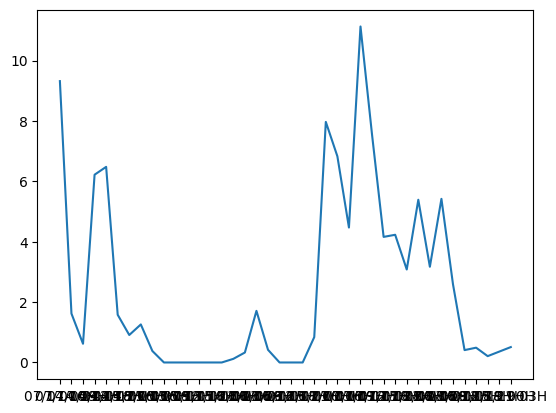

In [9]:
import matplotlib.pyplot as plt
plt.plot(time_list, rain_list)
plt.show()

In [11]:
API_KEY_M = "ceced042ac00c02d090680c43de18622"
targetDt = "20250713"
url_movie_daily = f"https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={API_KEY_M}&targetDt={targetDt}"


In [37]:
response_movie_daily = requests.get(url_movie_daily)
result_movie_daily = response_movie_daily.json()
movie_list = result_movie_daily["boxOfficeResult"]["dailyBoxOfficeList"]

# movie_list[0]
for i in range(10):
    rank = movie_list[i]["rank"]
    movieNm = movie_list[i]["movieNm"]
    audiCnt = movie_list[i]["audiCnt"]
    print(f"{rank:>2} : {movieNm} ({audiCnt})명")

 1 : 쥬라기 월드: 새로운 시작 (176894)명
 2 : 슈퍼맨 (141174)명
 3 : 노이즈 (119922)명
 4 : F1 더 무비 (106177)명
 5 : 드래곤 길들이기 (18443)명
 6 : 괴기열차 (15420)명
 7 : 엘리오 (14426)명
 8 : 극장판 도라에몽: 진구의 그림이야기 (5599)명
 9 : 명탐정 코난: 척안의 잔상 (4803)명
10 : 신명 (2580)명


In [49]:
# XML (eXtensible Markup Language)

# File -> New -> TextFile
import os
os.rename("untitled.txt",".env")

In [43]:
!pip install python-dotenv

In [50]:
from dotenv import load_dotenv
load_dotenv()

print(os.getenv("API_KEY_M"))

ceced042ac00c02d090680c43de18622


In [51]:
API_KEY_M = os.getenv("API_KEY_M")
targetDt = "20250713"
url_movie_daily_xml = f"https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?key={API_KEY_M}&targetDt={targetDt}"

In [ ]:
response_xml = requests.get(url_movie_daily_xml)
result_xml = response_xml.text
result_xml

In [64]:
import xml.etree.ElementTree as ET
root = ET.fromstring(result_xml)
# find(태그 이름) : 태그 하나, 현 위치 기준
# findall : 태그 전부
# .// 하위 태그에서 전부 검색
for movie in root.findall(".//daillyBoxOffice"):
    rank = movie.find("rank").text
    movieNm = movie.find("movieNm").text
    audiCnt = movie.find("audiCnt").text
    print(f"{rank}위 : {movieNm}({audiCnt}명)")

In [87]:
response_semicon = requests.get(url_semicon)
result_semicon = response_semicon.json()
result_semicon

{'currentCount': 21,
 'data': [{'DRAM_가격(달러)': '1.72',
   '디스플레이_생산(조원)': '33.0',
   '디스플레이_수입(억불)': 10,
   '디스플레이_수입증가율(퍼센트)': '42.9',
   '디스플레이_수출(억불)': 14,
   '디스플레이_수출증가율(퍼센트)': '75.0',
   '디스플레이_시장점유율(퍼센트)': '38.7',
   '반도체_생산(조원)': '34.6',
   '반도체_수입(억불)': '236.2',
   '반도체_수입증가율(퍼센트)': '10.7',
   '반도체_수출(억불)': '265.2',
   '반도체_수출증가율(퍼센트)': '35.7',
   '반도체_시장점유율(퍼센트)': '9.6',
   '액정표시장치(LCD)_평균가격(달러)': '28.9',
   '연도': 2004},
  {'DRAM_가격(달러)': '2.16',
   '디스플레이_생산(조원)': '36.0',
   '디스플레이_수입(억불)': 10,
   '디스플레이_수입증가율(퍼센트)': '0.0',
   '디스플레이_수출(억불)': 49,
   '디스플레이_수출증가율(퍼센트)': '250.0',
   '디스플레이_시장점유율(퍼센트)': '40.7',
   '반도체_생산(조원)': '32.4',
   '반도체_수입(억불)': '251.3',
   '반도체_수입증가율(퍼센트)': '6.4',
   '반도체_수출(억불)': '299.8',
   '반도체_수출증가율(퍼센트)': '13.1',
   '반도체_시장점유율(퍼센트)': '10.5',
   '액정표시장치(LCD)_평균가격(달러)': '28.0',
   '연도': 2005},
  {'DRAM_가격(달러)': '1.59',
   '디스플레이_생산(조원)': '40.6',
   '디스플레이_수입(억불)': 12,
   '디스플레이_수입증가율(퍼센트)': '20.0',
   '디스플레이_수출(억불)': 125,
   '디스플레이_수출증가율(퍼센트)': '155.

In [81]:
API_KEY_SEMICON = "NntDlcY4%2FgpprOVGmg2sLAjYT%2BSbJ3I3V0IB5LhGiE0sPwxbTqvUO%2BZsPvVsrw2UEIx%2FIa%2Bur7BFkKrL8UrDUg%3D%3D"
page = "1"
perPage = "21"
url_semicon = f"https://api.odcloud.kr/api/15051125/v1/uddi:f4385e69-c544-411d-b9f2-8201ec2351d1_202002270958?page={page}&perPage={perPage}&serviceKey={API_KEY_SEMICON}"
response_semicon = requests.get(url_semicon)
result_semicon = response_semicon.json()
# 2004년 ~ 2024년까지 반도체 수출 관련 data
result_semicon
year_list = [] # 연도(2004 ~ 2024) result_semicon["data"][0]["연도"]
market_share_semicon_list = [] # result_semicon["data"][0]["반도체_시장점유율(퍼센트)"]
# 21개의 데이터를 for문 돌면서 append
# y축 데이터가 숫자여야한다면 -> 형변환(casting)
for i in range(len(result_semicon["data"])):
    year_list.append(result_semicon["data"][i]["연도"])
    market_share_semicon_list.append(float(result_semicon["data"][i]["반도체_시장점유율(퍼센트)"]))
# 21개 데이터 추가 후
# matplotlib의 plot 함수를 활용해
# 선 그래프로 그려주세요 (x축 : 연도, y축 : 시장점유율)
import matplotlib.pyplot as plt
plt.plot(year_list, market_share_semicon_list)
plt.grid(True)
plt.show()

In [ ]:
API_KEY_POLICE = "NntDlcY4%2FgpprOVGmg2sLAjYT%2BSbJ3I3V0IB5LhGiE0sPwxbTqvUO%2BZsPvVsrw2UEIx%2FIa%2Bur7BFkKrL8UrDUg%3D%3D"
page = "1"
perPage = "10"
url_police = f"https://api.odcloud.kr/api/3074462/v1/uddi:efafd73f-3310-48f8-9f56-bddc1c51f3ba_201910221541?page={page}&perPage={perPage}&serviceKey={API_KEY_POLICE}"
response_police = requests.get(url_police)
result_police = response_police.json()
result_police
area_list = []
count_list =[]

for i in range(len(result_police["data"])):
    area_list.append(result_police["data"][i])
    count_list.append(result_police["data"][i])

